<a href="https://colab.research.google.com/github/ALiMehran01/Data-Science_Algorithm/blob/main/LAB08_ABtesting_20sw008.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##LAB#08 A/B testing
##RollNo 20sw008
##section: "ii"

##Part -01  Probability  
impoting libraries

In [6]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

####Now read data in ab_data.csv

In [7]:
# read data
df = pd.read_csv('ab_data.csv')

using below cell to find no of rows by using shape method

In [8]:
# check rows with shape method
df.shape

(127112, 5)

in order to get overview we use #info

In [9]:
# info helps to get an overview as well
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127112 entries, 0 to 127111
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   user_id       127112 non-null  int64  
 1   timestamp     127112 non-null  object 
 2   group         127112 non-null  object 
 3   landing_page  127111 non-null  object 
 4   converted     127111 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.8+ MB


finding no of unique users by using #unique method

In [10]:
# use unique method
users_unique = df.user_id.nunique()
users_unique

126377

proportion of users converted

In [11]:
# proportions of user who converted (i.e. converted = 1)
df[df.converted == 1].user_id.count()/df.shape[0]

# alternatively
df.converted.mean()

0.1197142654844978

no of times the #newpage and treatment don't line up


In [12]:
# there are two dimentions to this
# 1. get the number where landing_page equals new_page but group is not treatment
# 2. get the number where landing_page not new_page but group is treatment
# adding these two will give total misalignment
df[(df.landing_page == 'new_page') & (df.group != 'treatment')].user_id.count() + df[(df.landing_page != 'new_page') & (df.group == 'treatment')].user_id.count()

1755

chexking do any of row has missing values

In [13]:
# we find the rows with missing values with isnull
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    1
converted       1
dtype: int64

for the row where treatment is not aligned with new_page or control is not aligned with old_page

In [14]:
# using the same logic from e.
df2 = df.drop(df[((df.landing_page == 'new_page') & (df.group != 'treatment')) | ((df.landing_page != 'new_page') & (df.group == 'treatment'))].index)

In [15]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

checking how many userids in df2

In [16]:
# check for info
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125357 entries, 0 to 127111
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   user_id       125357 non-null  int64  
 1   timestamp     125357 non-null  object 
 2   group         125357 non-null  object 
 3   landing_page  125356 non-null  object 
 4   converted     125356 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 5.7+ MB


finding unique users

In [17]:
df2.user_id.nunique()

125356

df.info shows 3288 and df2.user_id_nuique means there is one duplicate

a there is one user_id which isrepeated what is it?

In [18]:
# here we look for duplicated user_id, but we show both of those in our result by keep=False
df2.user_id[df2.user_id.duplicated(keep=False)]

1899    773192
2893    773192
Name: user_id, dtype: int64

to find whole information of repeat user_id

In [19]:
# at what index duplicated user_id is
df2[df2.user_id.duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0.0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0.0


removing one of user but keeping dataframe as df2

In [20]:
# we can remove duplicates in multiple ways
# removing by index, removing by first or last entry as well as by unique column timestamp
df2 = df2[df2.timestamp != '2017-01-09 05:37:58.781806']

##now again quick-sanity check

In [21]:
# quick sanity check
df2.user_id.nunique()

125356

4 use the df2 in below cell to answer the questions related to quiz4 in classroom

a--what is the probability of an individual converting regardless of the page they recieve

In [22]:
df2.converted.mean()

# alternativelyA
df2.describe().loc['mean'].converted

0.11970005185273823

b--Given that an individual was in the control group..what is probability the converted??

In [23]:
# logic: query the converted column where group column value is control and take mean
df2.converted[df2.group == 'control'].mean()

0.120098470195182

c--Given that an individual was in the Treatment group..what is probability the converted??

In [24]:
# same logic as above, here we do it for treatment instead of control
df2.converted[df2.group == 'treatment'].mean()

0.1193031625210994

d--what is the probability of an individual recievd the new page

In [25]:
df2[df2.landing_page == 'new_page'].count()/df2.shape[0]

user_id         0.500957
timestamp       0.500957
group           0.500957
landing_page    0.500957
converted       0.500957
dtype: float64

In [26]:
df2.user_id.nunique()

125356

In [27]:
# at what index duplicated user_id is
df2[df2.user_id.duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted


In [28]:
# we can remove duplicates in multiple ways
# removing by index, removing by first or last entry as well as by unique column timestamp
df2 = df2[df2.timestamp != '2017-01-09 05:37:58.781806']

In [29]:
df2.converted.mean()

# alternatively
df2.describe().loc['mean'].converted

0.11970005185273823

In [30]:
# logic: query the converted column where group column value is control and take mean
df2.converted[df2.group == 'control'].mean()

0.120098470195182

In [31]:
# same logic as above, here we do it for treatment instead of control
df2.converted[df2.group == 'treatment'].mean()

0.1193031625210994

In [32]:
# convert rate is how many users converted (i.e. converted = 1)
p_new = df2.converted.mean()
p_new

0.11970005185273823

In [33]:
p_old = df2.converted.mean() # the same!!!
p_old

0.11970005185273823

In [34]:
# number of users who got the new page (i.e. group = treatment)
n_new = df2[df2.group == 'treatment'].count()[0]
n_new

62798

In [35]:
# number of users who reamined with old page (i.e. group = control)
n_old = df2[df2.group == 'control'].count()[0]
n_old

62557

In [36]:
# simulating n_new transaction that have probabiliy of receiving new page, using binomial gives the outout as the number of 1's
new_page_converted = np.random.binomial(1,p_new,n_new)
new_page_converted.mean()

0.11963756807541641

In [37]:
# alternatively
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
new_converted_simulation.mean()

0.11969363674002356

##f. Simulate
 transactions with a convert rate of
 under the null. Store these
 1's and 0's in old_page_converted

In [38]:
# simulating n_new transaction that have probabiliy of having old page, using binomial gives the outout as the number of 1's
old_page_converted = np.random.binomial(1,p_old,n_old)
old_page_converted.mean()

0.12088175583867512

In [39]:
# alternatively
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
old_converted_simulation.mean()

0.1196979186981473

In [40]:
# probabilty of new and old page based upon simulated values in e. and f.
p_new = new_page_converted.mean()
p_old = old_page_converted.mean()
p_new - p_old

-0.001244187763258714

In [41]:
# alternatively
new_converted_simulation.mean() - old_converted_simulation.mean()

-4.28195812374188e-06

In [42]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(1,p_new,n_new)  # bootstrapping
    old_page_converted = np.random.binomial(1,p_old,n_old) # bootstrapping
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

In [43]:
# alternatively
p_diffs_alt = new_converted_simulation - old_converted_simulation

In [44]:
# convert p_diffs to numpy array for array based computations in the future
p_diffs = np.array(p_diffs)

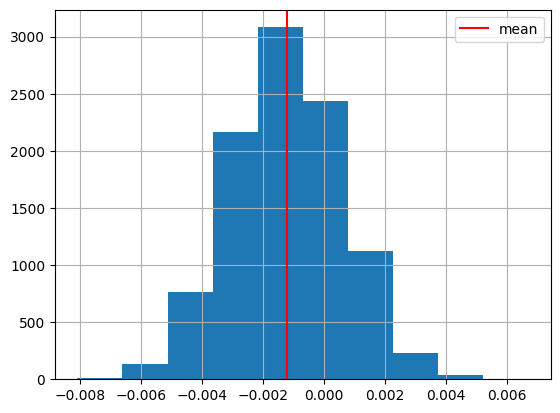

In [45]:
# histogram
plt.hist(p_diffs)
plt.grid()
plt.axvline(p_diffs.mean(), color='r', label='mean')
plt.legend();

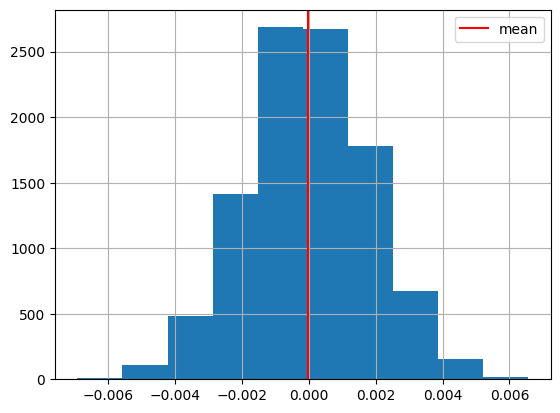

In [46]:
# alternatively
# histogram
plt.hist(p_diffs_alt)
plt.grid()
plt.axvline(p_diffs_alt.mean(), color='r', label='mean')
plt.legend();

In [47]:
actual_diff = df2.converted[df2.group == 'treatment'].mean() - df2.converted[df2.group == 'control'].mean()
(actual_diff < p_diffs).mean()

0.4041

In [48]:
# alternatively
actual_diff = df2.converted[df2.group == 'treatment'].mean() - df2.converted[df2.group == 'control'].mean()
(actual_diff < p_diffs_alt).mean()

0.6641

In [49]:
# quick check before diving in
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0.0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0.0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0.0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0.0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1.0


In [51]:
import statsmodels.api as sm

convert_old = df2[df2.group == 'control'].converted.sum()
convert_new = df2[df2.group == 'treatment'].converted.sum()
n_old = df2[df2.group == 'control'].converted.count()
n_new = df2[df2.group == 'treatment'].converted.count()

In [52]:
# based upon the documentation
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_score, p_value

(0.43372324460886363, 0.6677552875299806)

In [53]:
# quick consistency check
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0.0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0.0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0.0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0.0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1.0


In [54]:
# copy the dataframe to a new one, for clarity
df2_copy = df2.copy()

In [55]:
# another sanity check, if True, go ahead
df2_copy.shape == df2.shape

True

In [ ]:
# add an intercept
df2_copy['intercept'] = 1

# using pd.get_dummies to convert the 'landing_page' and 'group' to 1s and 0s
df2_copy[['landing_page_new', 'landing_page_old']] = pd.get_dummies(df2_copy['landing_page'])
df2_copy[['ab_page_control','ab_page_treatment']] = pd.get_dummies(df2_copy['group'])

In [ ]:
# here, we will use landing_page_old and ab_page_control as our baselines, therefore remove those
df2_copy.drop(['landing_page_old','ab_page_control'], axis=1, inplace=True)

In [59]:
df2_copy.head()

,user_id,timestamp,group,landing_page,converted,intercept,landing_page_new,landing_page_old
0,851104,2017-01-21 22:11:48.556739,control,old_page,0.0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0.0,1,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0.0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0.0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1.0,1,0,1


In [ ]:
logit_mod = sm.Logit(df2_copy['converted'], df2_copy[['intercept', 'ab_page_treatment']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6

In [ ]:
results.summary()

Logit Regression Results
Dep. Variable:	converted	No. Observations:	290584
Model:	Logit	Df Residuals:	290582
Method:	MLE	Df Model:	1
Date:	Sun, 18 Mar 2018	Pseudo R-squ.:	8.077e-06
Time:	22:06:42	Log-Likelihood:	-1.0639e+05
converged:	True	LL-Null:	-1.0639e+05
LLR p-value:	0.1899
coef	std err	z	P>|z|	[0.025	0.975]
intercept	-1.9888	0.008	-246.669	0.000	-2.005	-1.973
ab_page_treatment	-0.0150	0.011	-1.311	0.190	-0.037	0.007
#

In [62]:
# read file and join the dfs
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [63]:
# quick check
df_new.head()

,country,timestamp,group,landing_page,converted
user_id,,,,,
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0.0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0.0
909908,UK,2017-01-06 20:44:26.334764,treatment,new_page,0.0
887018,US,2017-01-06 11:09:40.487196,treatment,new_page,0.0
666132,UK,2017-01-19 22:45:47.593706,treatment,new_page,0.0


In [64]:
# Create the necessary dummy variables
df_new[['canada','uk','us']] = pd.get_dummies(df_new['country'])

In [65]:
# let's consider US being our baseline, therefore, we drop US
df_new.drop(['us'], axis=1, inplace=True)

In [66]:
df_new.head()

,country,timestamp,group,landing_page,converted,canada,uk
user_id,,,,,,,
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0.0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0.0,0,1
909908,UK,2017-01-06 20:44:26.334764,treatment,new_page,0.0,0,1
887018,US,2017-01-06 11:09:40.487196,treatment,new_page,0.0,0,0
666132,UK,2017-01-19 22:45:47.593706,treatment,new_page,0.0,0,1


In [ ]:
# fitting linear model
df_new['intercept'] = 1

logit_mod = sm.Logit(df_new['converted'], df_new[['intercept','canada','uk']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6

In [68]:
1/np.exp(-0.0408), np.exp(0.0099)

(1.0416437559600236, 1.0099491671175422)

#END OF LAB-08